<a href="https://colab.research.google.com/github/mispelledname/ml_tutorials/blob/master/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classify images of clothing**

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0-rc3


## **The Data**

### **Import the dataset**
The Fashion mnist dataset contains grayscale images of clothing from 10 different categories at a low resolution (28 by 28 pixels). 

60,000 images for training; 10,000 images for testing

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

# load the data set into four numpy arrays
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
set(test_labels)

4423680/4422102 [==============================] - 0s 0us/step


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Label | Class
--- | ---
0 | T-shirt
1 | Trouser
2 | Pullover
3 | Dress
4 | Coat
5 | Sandal
6 | Shirt
7 | Sneaker
8 | Bag
9 | Ankle boot 

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### **Exploring the data**
Find out how the data is formatted.


In [8]:
# Train data set
print(train_images.shape)
print(len(train_images))
print(train_labels)
print("\n")

# Test data set
print(test_images.shape)
print(len(test_images))
print(test_labels)

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


(10000, 28, 28)
10000
[9 2 1 ... 8 1 5]


### **Pre-process the data**
1. Normalize the pixel values: [0, 255] to [0, 1]

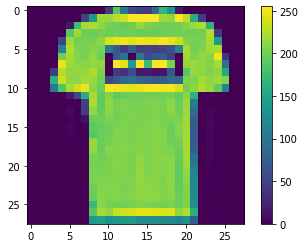

In [12]:
# before processing 
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# scale the values down
PIXEL_RANGE = 255.0
train_images = train_images / PIXEL_RANGE
test_images = test_images / PIXEL_RANGE

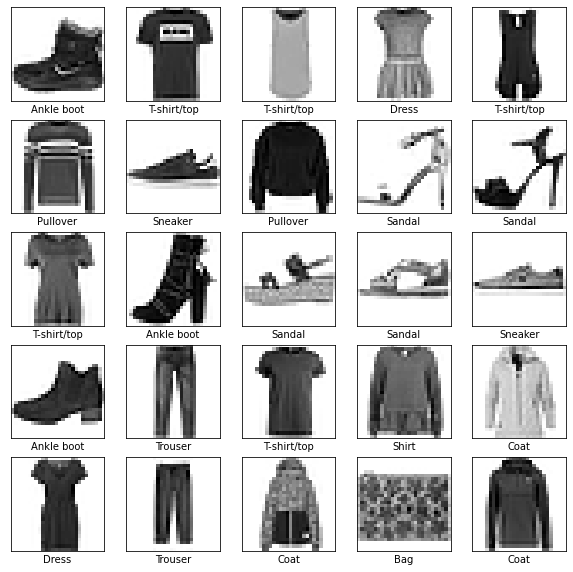

In [18]:
# view the first 25 images with labels
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary) #plt.cm.binary makes the images black and white 
  plt.xlabel(class_names[train_labels[i]])
plt.show()


## **Build The Model**
1. Set up the layers
2. Compile the model

### **Setting up layers**
We are once again using a `Sequential` model. 
- `keras.layers.Flatten` : The first layer transforms the format of the images from a 28 by 28 2D-array of pixel values to a 1D-array. This layer does not learn anything, it just reformats the data. 
- `keras.layers.Dense` : The next two layers are densely-connected neural layers. The first parameter represents the number of neurons.
- The final layer (second Dense layer) returns a logits array of 10, where each node represents a score that indicates the current image belongs to one of the ten classes. 


In [21]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)), 
  keras.layers.Dense(128, activation="relu"),
  keras.layers.Dense(10)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### **Compiling the model**
1. `loss` measures the accuracy during training, aim is to minimize.
2. `optimizer`: how the model is updated based on the data it sees and its loss function. 
3. `metrics`: used to monitor the training and testing steps. 

In [0]:
model.compile(optimizer="adam", 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=["accuracy"]) # fraction of correctly classified images

## **Train The Model**
1. Feed the model.
2. The model learns to classify images by the labels.
3. Make predictions on the test data set.
4. Verify the predictions. 

### **Feed the model**
`model.fit` fits the model to the training data. Parameters include:
- `train_images` inputs of the model
- `train_labels` correct outputs of the model 
- `epochs` number of times going through the training data set

In [23]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5006 - accuracy: 0.8251
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3767 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3394 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3120 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2980 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2806 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2691 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2596 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2494 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

### **Evaluate the accuracy**
`model.evaluate` makes predictions on the test data set to evaluate the accuracy of the model. Its parameters are:
- `test_images` inputs to the model
- `test_labels` correct test outputs

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\nTest Accuracy: ", test_acc)

313/313 - 0s - loss: 0.3544 - accuracy: 0.8752

Test Accuracy:  0.8751999735832214


The disparity between the training accuracy and the test accuracy is due to *overfitting*. 

### **Make predictions**
- The model gives up linear outputs called `logits`. To make them easier to interpret, attach a `Softmax` layer to convert the outputs into probabilities (array of 10 probabilities).
- `model.predict` takes in input images and returns predicted categories.

In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

The classification is the label with the highest confidence level. We can use `np.argmax` or `np.max` to determine the classification.

### **Visualize the predictions**
We can graph the images with their corresponding predicted and true labels, as well as the probability an image belongs to each of the classifications. 

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = "blue"
  else:
    color = "red"

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                       100*np.max(predictions_array),
                                       class_names[true_label], 
                                       color=color))
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("blue")

Evidently, the model can sometimes be very confident and still be wrong. 

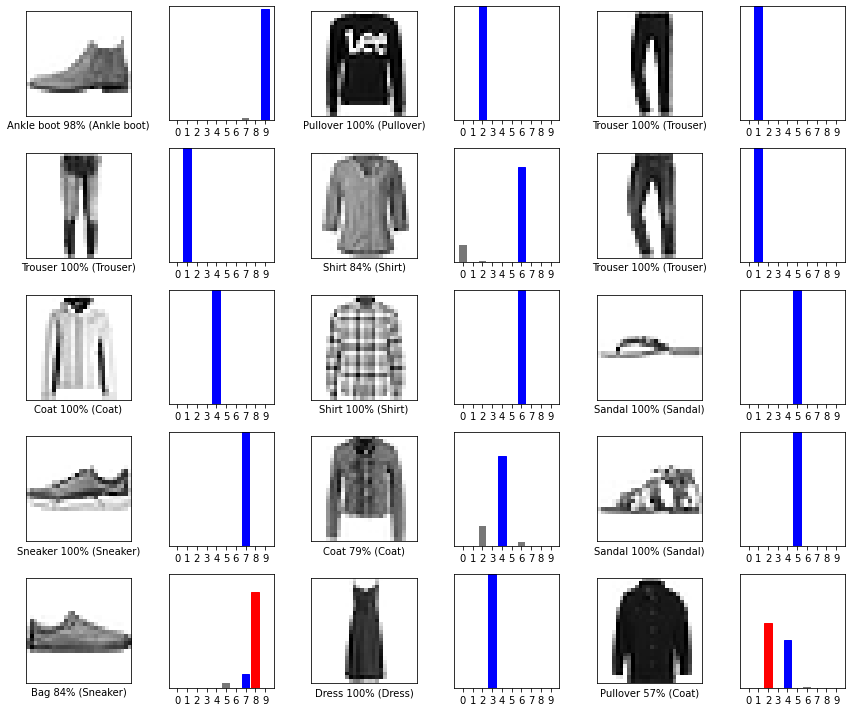

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### **Use the model**
`model.predict` can be called with a single image input parameter when using the model to classify clothing. 
1. Grab an image.
2. Add the image to a batch using `np.expand_dims(img, 0)`.
3. Predict the correct label.

(28, 28)
(1, 28, 28)
[[7.0203641e-06 1.1892453e-15 9.9988735e-01 5.2937044e-13 4.0261020e-05
  8.5647050e-15 6.5359309e-05 2.4452543e-20 1.0459626e-10 1.3280175e-19]]
Pullover


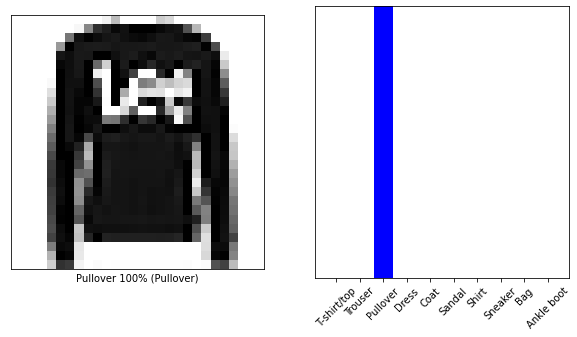

In [58]:
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

# Make a prediction. 
predictions_single = probability_model.predict(img)
print(predictions_single)

# The prediction
predicted_number = np.argmax(predictions_single[0])
print(class_names[predicted_number])

# Plot the probabilities for that prediction.
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_image(1, predictions_single, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()